In [25]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
import minisom
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
import LVQ

In [26]:
data = pd.read_csv(r"data/SVNE_Hieu.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=20)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [27]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x_train)
som.train_random(data = x_train, num_iteration = 100)

In [28]:
np.unique(y)

array([0, 1], dtype=int64)

In [29]:
labels = np.zeros((10, 10))
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

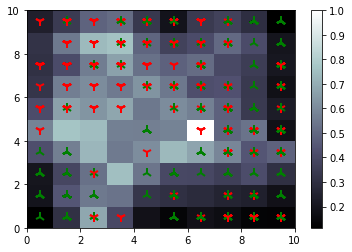

In [30]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['1', '2']
colors = ['r', 'g']
for i, x in enumerate(x_train):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[w[0], w[1]] -= 1
    elif y_train[i] == 1:
        labels[w[0], w[1]] += 1
show()

In [31]:
labels

array([[  1.,   6.,   9.,   1.,  -2.,  -5.,  -1., -85.,   0.,  -2.],
       [ 22.,  59.,  10.,   7.,   0.,  -6.,  -8., -38., -14.,  -7.],
       [  0.,   7.,   0.,   0.,   0.,  -6.,  -7., -38., -10., -12.],
       [ -2.,   0.,   0.,   0.,   0.,  -4., -13., -33., -18.,  -8.],
       [  0.,   1.,   1.,  -1.,  11.,   0., -15., -15., -13.,   2.],
       [ 12.,  15.,  25.,   0.,   0.,   0.,  -1.,  -2.,  -4.,  -3.],
       [ 16.,   0.,   1.,   6.,  -4.,   5.,  -8., -13.,  -4., -13.],
       [ -8.,   4.,   7.,   2.,  15.,  14.,   2.,   0.,   1.,   4.],
       [  8.,  23.,   2.,   2.,  34.,  20.,   1.,   2.,   1.,  62.],
       [  4.,  14.,   4.,   4.,  27.,   0.,   3.,  24.,  14.,   7.]])

In [32]:
# parameter for LVQ
R = 50 # R is the # of initial prototype for each class
n_classes = 2
epsilon = 0.9
epsilon_dec_factor = 0.001

In [33]:
from random import randint
p_vectors = []
for i in range(10):
    for j in range(10):
        if(labels[i][j] == 0):
            p = LVQ.prototype(randint(0,1), som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(labels[i][j] > 0):
            p = LVQ.prototype(1, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(labels[i][j] < 0):
            p = LVQ.prototype(0, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

1 	 [0.36124372 0.39919781 0.48719889 0.42560621 0.53349724 0.08379359]
1 	 [0.34927753 0.41252641 0.55392057 0.3673505  0.50107487 0.12237952]
1 	 [0.31795178 0.42437595 0.58795299 0.35494097 0.47493248 0.14689809]
1 	 [0.30666537 0.39881391 0.54309361 0.41154429 0.50896619 0.15342052]
0 	 [0.39772831 0.30736241 0.45379475 0.44912803 0.47868771 0.33249503]
0 	 [0.30315742 0.27802142 0.45219271 0.37994012 0.39738996 0.56925227]
0 	 [0.23344123 0.2640168  0.46395768 0.32231541 0.28240712 0.69058134]
0 	 [0.17317982 0.23222874 0.48036071 0.24747119 0.19832095 0.76469534]
0 	 [0.2342935  0.25993978 0.47026693 0.31060438 0.28588947 0.69150489]
0 	 [0.2683267  0.32603954 0.53285553 0.32973784 0.36209197 0.54582629]
1 	 [0.35709955 0.4104135  0.49648098 0.42193581 0.52424368 0.06845469]
1 	 [0.33599072 0.44004766 0.54921381 0.35645336 0.50981724 0.06971266]
1 	 [0.31802423 0.42633356 0.57133572 0.36172785 0.47478577 0.18549182]
1 	 [0.32932521 0.39674053

In [34]:
lvq = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=R, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq.fit(x_train, y_train)

In [35]:
predicted_y = [lvq.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.90      0.72      0.80        60
          1       0.80      0.93      0.86        73

avg / total       0.84      0.83      0.83       133



In [36]:
A = np.array(predicted_y)-y_test
len(A[A==0])/len(A)

0.8345864661654135